<center><span style="font-size:25px;">ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА</span></center>

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

<u>Описание столбцов</u>:

|<center><u>Наименование столбца</u></center>|<center><u>Описание</u></center>|
|-|-|
|`work_year`|Год, в котором была выплачена зарплата.|
|`experience_level`|Опыт работы на этой должности в течение года со следующими возможными значениями: <li><em>`EN` — Entry-level/Junior;</em></li> <li><em>`MI` — Mid-level/Intermediate;</em></li> <li><em>`SE` — Senior-level/Expert;</em></li> <li><em>`EX` — Executive-level/Director.</em></li>|
|`employment_type`|Тип трудоустройства для этой роли: <li><em>`PT` — неполный рабочий день;</em></li> <li><em>`FT` — полный рабочий день;</em></li> <li><em>`CT` — контракт;</em></li> <li><em>`FL` — фриланс.</em></li>|
|`job_title`|Роль, в которой соискатель работал в течение года.|
|`salary`|Общая выплаченная валовая сумма заработной платы.|
|`salary_currency`|Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.|
|`salary_in_usd`|Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).|
|`employee_residence`|Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.|
|`remote_ratio`|Общий объём работы, выполняемой удалённо. Возможные значения: <li><em>`0` — удалённой работы нет (менее 20 %);</em></li> <li><em>`50` — частично удалённая работа;</em></li> <li><em>`100` — полностью удалённая работа (более 80 %).</em></li>|
|`company_location`|Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.|
|`company_size`|Среднее количество людей, работавших в компании в течение года: <li><em>`S` — менее 50 сотрудников (небольшая компания);</em></li> <li><em>`M` — от 50 до 250 сотрудников (средняя компания);</em></li> <li><em>`L` — более 250 сотрудников (крупная компания).</em></li>|

<p>Исследуйте данные и сделайте выводы по полученным результатам. Подкрепите свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверьте, являются ли выводы статистически значимыми.</p>
<p>В процессе своего анализа вы должны:</p>
<ol>
<li>Выяснить, какие факторы влияют на зарплату специалиста <em>Data Scientist</em>.</li>
<li>А также ответить на <strong>ключевые вопросы HR-агентства</strong>:
<ul style="list-style-type: square;">
<li>Наблюдается ли ежегодный рост зарплат у специалистов <em>Data Scientist</em>?</li>
<li>Как соотносятся зарплаты <em>Data Scientist</em> и <em>Data Engineer</em> в 2022 году?</li>
<li>Как соотносятся зарплаты специалистов <em>Data Scientist</em> в компаниях различных размеров?</li>
<li>Есть ли связь между наличием должностей <em>Data Scientist</em> и <em>Data Engineer</em> и размером компании?</li>
</ul>
</li>
</ol>
<p>Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе.</p>
<p>Продемонстрируйте использование разных тестов для проверки статистической значимости сделанных выводов:</p>
<ul style="list-style-type: square;">
<ul style="list-style-type: square;">
<li>тесты для количественного признака:
<ul style="list-style-type: square;">
<ul style="list-style-type: square;">
<li>для одной выборки;</li>
<li>для двух выборок;</li>
<li>для нескольких выборок;</li>
</ul>
</ul>
</li>
<li>тест для категориальных признаков.</li></ul></ul>

Проект был сделан на `Python 3.11.6`

<h2 id='contents'>Оглавляшка:</h2>

* [Загружаемые библиотеки](#libs)
* [Загрузка данных и удаление дублирующих строк](#firststage)

Разведывательный анализ:

* [Беглый анализ признака `salary_in_usd` и удаление выбросов](#salusdoutl)
* [Классификация/обощение ролей по тем или иным профессиям](#rolesclass)
* [Визуализация среднего годового дохода в зависимости от признаков](#meansalbyft) опыт работы, год, размер компании
* [Динамика среднего годового дохода в зависимости от признаков](#dynameansalbyft) опыт работы, год, размер компании
* [Соотношение между тем, где расположена компания и тем, где проживает специалист](#compemploc)
* [Динамика по формату занятости](#remotedyna)
* [Обычный value_counts по годам](#vcyear)

Статистический анализ данных

* [Гипотеза о ежегодном росте зп](#saluphypo)
* [Гипотеза о соотношении зарплат DS и DE](#dsdesalhypo)
* [Гипотеза о соотношении зарплат DS в компаниях разных размеров](#compsizedssal)
* [Гипотеза о связи между наличием должностей DS и DE, и размером компании](#dsdeconncoomsize)
* [Дополнительные исследования](#addirese) можно не смотреть

## Загружаемые библиотеки <a id='libs'></a>

In [1]:
from data.functions_akialema import *

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # чтоб цифры по какой-нибудь оси отображались в формате 100к$.
import seaborn as sns

import scipy.stats as stats

# Библиотека для масштабирования или шкалирования.
from sklearn import preprocessing

# Оставлю тут отображение всей строки, полезная вещь, когда ковыряешься в данных вручную.
pd.set_option('display.max_colwidth', 50) #50 отображение всего текста в ячейке
pd.set_option('display.width', 80) #80
pd.set_option('display.max_rows', 60) #60 - длинна вывода (вниз)
pd.set_option('display.float_format', None) #None чтоб нормально float отображался ('{:.6f}'.format)

# Я забыл, но это параметры отображения графиков.
%matplotlib inline
matplotlib.style.use('fast')

# Сразу обозначу уровень значимости альфа.
alpha = 0.05

## Загрузка данных и удаление дубликатов<a id='firststage'></a>

In [2]:
incoming_df = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1bPB4TYdVZbLIa4374UXQoJEEFfpXDpqv', index_col=0)

print(f'В наших данных {incoming_df.isna().sum().sum()} пропусков в целом.')
print(f'В наших данных {incoming_df.duplicated().sum()} дублирующих записи.', '\n')

my_info(incoming_df)

В наших данных 0 пропусков в целом.
В наших данных 42 дублирующих записи. 

memory usage: 283.6 KB


,column,num of unique vals,type,mode,number of entries,NaN vals,number of dublics,describe
0,company_size,3,object,M,607,0,42,see type column
1,remote_ratio,3,int64,100,607,0,42,min...: 0.00max..: 100.00mean: 70.92std....: 40.71
2,work_year,3,int64,2022,607,0,42,min...: 2020.00max..: 2022.00mean: 2021.41std....: 0.69
3,employment_type,4,object,FT,607,0,42,see type column
4,experience_level,4,object,SE,607,0,42,see type column
5,salary_currency,17,object,USD,607,0,42,see type column
6,company_location,50,object,US,607,0,42,see type column
7,job_title,50,object,Data Scientist,607,0,42,see type column
8,employee_residence,57,object,US,607,0,42,see type column
9,salary,272,int64,80000,607,0,42,min...: 4000.00max..: 30400000.00mean: 324000.06std....: 1544357.49


Предварительно, с высоты моего уровня анализа (0), можно сделать следующие выводы:
- пропусков в данных не наблюдается;
- наблюдается наличие дублирующих записей;
- наблюдается 9 категориальных и 2 количественных признака;
- основные статистические характеристики, по сути, есть только у одного столбца, я его ещё буду разбирать ниже;
- в таблице присутствуют 2 признака, которые несут в себе одинаковую информацию: `salary` и `salary_in_usd`, которые характеризуют, как я понял, информацию о зарплате за год. Хоть корреляция между этими признаками и низкая (-0.084), призак `salary_in_usd`, как по мне, является следствием преобразования признаков `salary` и `salary_currency`. Потому, считаю, что они лишние в данной таблице.

И, согласно наблюдениям, я преобразовываю таблицу: удалю признак `salary` и приведу признак `salary_currency` к виду: 1, если доллар, 0, если нет.

In [3]:
df = incoming_df.drop(['salary'], axis=1).drop_duplicates()
df['salary_currency'] = df['salary_currency'].apply(lambda x: 1 if x == 'USD' else 0)
df.shape

(565, 10)

## Разведывательный анализ данных

[↑ contents](#contents)

<h3 id='salusdoutl'>Беглый анализ признака salary_in_usd и удаление выбросов</h3>

Проведу беглый анализ признака `salary_in_usd`.

In [4]:
print(df['salary_in_usd'].describe())
display(df.query('salary_in_usd > 300000').iloc[:, [1,2,3,5,7,8]])
display(df.query('salary_in_usd < 10000').iloc[:, [1,2,3,5,7,8]].sort_values(by='salary_in_usd'))

count       565.000000
mean     110610.343363
std       72280.702792
min        2859.000000
25%       60757.000000
50%      100000.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64


,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location
25,EX,FT,Director of Data Science,325000,100,US
33,MI,FT,Research Scientist,450000,0,US
63,SE,FT,Data Scientist,412000,100,US
97,MI,FT,Financial Data Analyst,450000,100,US
157,MI,FT,Applied Machine Learning Scientist,423000,50,US
225,EX,CT,Principal Data Scientist,416000,100,US
252,EX,FT,Principal Data Engineer,600000,100,US
482,EX,FT,Data Engineer,324000,100,US
519,SE,FT,Applied Data Scientist,380000,100,US
523,SE,FT,Data Analytics Lead,405000,100,US


,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location
176,MI,FT,Data Scientist,2859,0,MX
185,MI,FT,Data Engineer,4000,100,IR
238,EN,FT,Data Scientist,4000,0,VN
77,MI,PT,3D Computer Vision Researcher,5409,50,IN
179,MI,FT,Data Scientist,5679,100,US
18,EN,FT,Data Science Consultant,5707,50,IN
213,EN,FT,Big Data Engineer,5882,0,CH
21,MI,FT,Product Data Analyst,6072,100,IN
50,EN,FT,Data Analyst,6072,0,IN
15,MI,FT,Data Analyst,8000,50,PK


Дескрайб рассказывает о том, что в данных наблюдаются да, бесспорно, правдоподобные, но аномальные для данного датасета цифры зарплат.
Как например 600к$ в год или 2859$ в год. (я полагаю, что я анализирую амерканскую базу, а у них з/п - в год)  

К примеру, можно посмотреть на распределение признака:

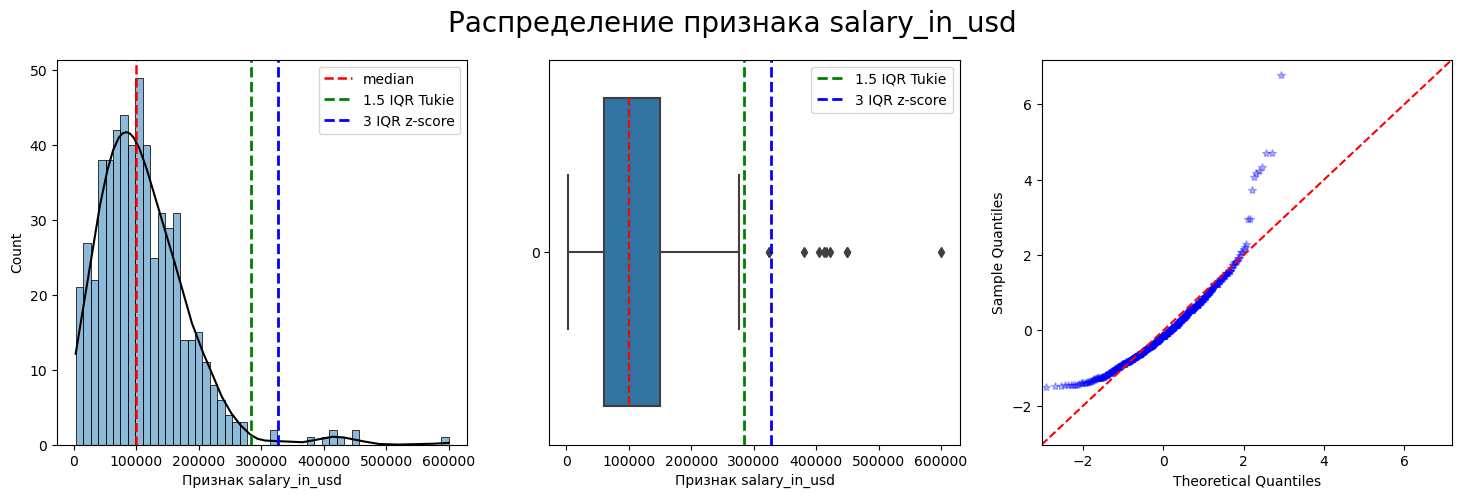

In [5]:
hist_box_qq(df['salary_in_usd']).show('png')

Коробчатая диаграмма нам и показывает как раз те значения, которые больше 300к.

Моё предложение - удалить аномальные данные по признаку `salary_in_usd` и оставить только данные, которые меньше 300к долл. и больше 10к долл.  

Аномальные значения буду убирать по методу Тьюки.  
Проверю правильность работы метода:

In [6]:
outliers = outliers_iqr_mode_log(df, 'salary_in_usd', left=2, right=0.7, log_scale=True)[0]
display(outliers.sort_values(by='salary_in_usd'))

df = df.drop(outliers.index, axis=0).reset_index(drop=True)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
176,2021,MI,FT,Data Scientist,0,2859,MX,0,MX,S
238,2021,EN,FT,Data Scientist,1,4000,VN,0,VN,M
185,2021,MI,FT,Data Engineer,1,4000,IR,100,IR,M
77,2021,MI,PT,3D Computer Vision Researcher,0,5409,IN,50,IN,M
179,2021,MI,FT,Data Scientist,0,5679,IN,100,US,S
18,2020,EN,FT,Data Science Consultant,0,5707,IN,50,IN,M
213,2021,EN,FT,Big Data Engineer,0,5882,IN,0,CH,L
21,2020,MI,FT,Product Data Analyst,0,6072,IN,100,IN,L
50,2020,EN,FT,Data Analyst,0,6072,IN,0,IN,S
15,2020,MI,FT,Data Analyst,1,8000,PK,50,PK,L


Взгляну на распределение:

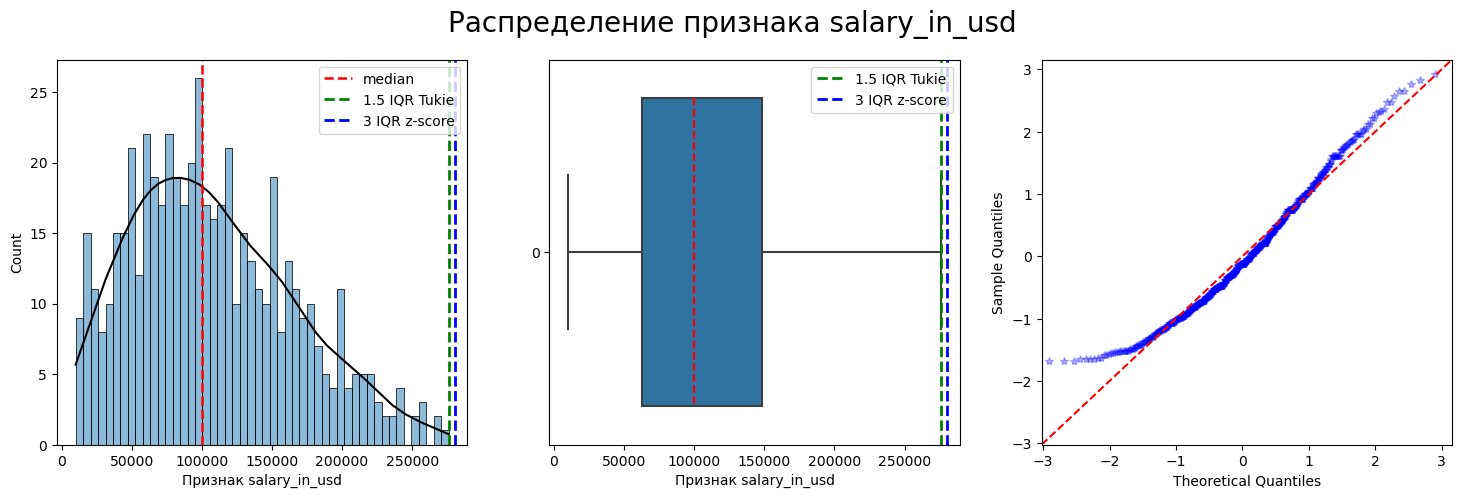

In [7]:
hist_box_qq(df['salary_in_usd']).show('png')

[↑ contents](#contents)

<h3 id='rolesclass'>Классификация/обощение ролей</h3>

На этом моменте я временно оставлю признак `salary_in_usd` и посмотрю на категориальные признаки.

Итак, для начала я посчитал количество записей в столбцах. И отобразил их в процентном соотношении.  
Т.е. на оси х находится % количества той или иной записи. Имхо удобно.

Так, внимание!!!

Должностей в нашем стобце должностей много, 20% из них составляют сумму одиночных или малого количества записей. Я спросил у гопник-чата: как наиболее корректно мне распределить эти все профессии по исполняемым ролям. И вот, что он мне представил:

Ваш перечень профессий впечатляет! Давайте попробуем объединить их на основе схожести должностных обязанностей:

||||
|-|-|-|
|Data Scientist Roles:|Data Engineering Roles:|Machine Learning Roles:|
|<li>Data Scientist;</li> <li>Research Scientist;</li> <li>Principal Data Scientist;</li> <li>Applied Data Scientist;</li> <li>Lead Data Scientist;</li> <li>Staff Data Scientist;</li>|<li>Data Engineer;</li> <li>Big Data Engineer;</li> <li>Lead Data Engineer;</li> <li>Principal Data Engineer;</li> <li>Cloud Data Engineer;</li> <li>ETL Developer;</li>|<li>Machine Learning Engineer;</li> <li>Machine Learning Scientist;</li> <li>ML Engineer;</li> <li>Machine Learning Infrastructure Engineer;</li> <li>Computer Vision Engineer;</li> <li>Applied Machine Learning Scientist;</li> <li>Machine Learning Developer;</li> <li>Lead Machine Learning Engineer;</li>|
|Management Roles:|Analytics and BI Roles:|Specialized Roles:|
|<li>Data Science Manager;</li> <li>Data Analytics Manager;</li> <li>Data Engineering Manager;</li> <li>Machine Learning Manager;</li> <li>Director of Data Science;</li> <li>Director of Data Engineering;</li> <li>Head of Data;</li> <li>Head of Data Science;</li> <li>Head of Machine Learning;</li>|<li>Data Analyst;</li> <li>BI Data Analyst;</li> <li>Principal Data Analyst;</li> <li>Lead Data Analyst;</li> <li>Business Data Analyst;</li> <li>Analytics Engineer;</li> <li>Data Analytics Engineer;</li> <li>Financial Data Analyst;</li> <li>Finance Data Analyst; <li>Marketing Data Analyst;</li> <li>Product Data Analyst;</li>|<li>AI Scientist;</li> <li>Computer Vision Software Engineer;</li> <li>NLP Engineer;</li> <li>Big Data Architect;</li> <li>Data Architect;</li> <li>Data Specialist;</li> <li>Data Science Engineer;</li> <li>Data Science Consultant;</li>|

In [8]:
# Экспериментальня ячейка.
role_mapping = {
    "Data Scientist": "Data Scientist Roles", #<------
    "Research Scientist": "Data Scientist Roles",
    "Principal Data Scientist": "Data Scientist Roles",
    "Applied Data Scientist": "Data Scientist Roles",
    "Lead Data Scientist": "Data Scientist Roles",
    "Staff Data Scientist": "Data Scientist Roles",
    "Data Engineer": "Data Engineering Roles", #<------
    "Big Data Engineer": "Data Engineering Roles",
    "Lead Data Engineer": "Data Engineering Roles",
    "Principal Data Engineer": "Data Engineering Roles",
    "Cloud Data Engineer": "Data Engineering Roles",
    "ETL Developer": "Data Engineering Roles",
    "Machine Learning Engineer": "Machine Learning Roles", #<------
    "Machine Learning Scientist": "Machine Learning Roles",
    "ML Engineer": "Machine Learning Roles",
    "Machine Learning Infrastructure Engineer": "Machine Learning Roles",
    "Computer Vision Engineer": "Machine Learning Roles",
    "Applied Machine Learning Scientist": "Machine Learning Roles",
    "Machine Learning Developer": "Machine Learning Roles",
    "Lead Machine Learning Engineer": "Machine Learning Roles",
    "Data Science Manager": "Management Roles", #<------ 
    "Data Analytics Manager": "Management Roles",
    "Data Engineering Manager": "Management Roles",
    "Director of Data Science": "Management Roles",
    "Head of Data": "Management Roles",
    "Director of Data Engineering": "Management Roles",
    "Head of Data Science": "Management Roles",
    "Machine Learning Manager": "Management Roles",
    "Head of Machine Learning": "Management Roles",
    "Data Analyst": "Analytics and BI Roles", #<------ 
    "BI Data Analyst": "Analytics and BI Roles",
    "Business Data Analyst": "Analytics and BI Roles",
    "Analytics Engineer": "Analytics and BI Roles",
    "Data Analytics Engineer": "Analytics and BI Roles",
    "Financial Data Analyst": "Analytics and BI Roles",
    "Marketing Data Analyst": "Analytics and BI Roles",
    "Product Data Analyst": "Analytics and BI Roles",
    "Finance Data Analyst": "Analytics and BI Roles",
    "Principal Data Analyst": "Analytics and BI Roles",
    "Lead Data Analyst": "Analytics and BI Roles",
    "Computer Vision Software Engineer": "Specialized Roles", #<------
    "NLP Engineer": "Specialized Roles",
    "AI Scientist": "Specialized Roles",
    "Big Data Architect": "Specialized Roles",
    "Data Architect": "Specialized Roles",
    "Data Specialist": "Specialized Roles",
    "Data Science Engineer": "Specialized Roles",
    "Data Science Consultant": "Specialized Roles"
}

df['job_title_roles'] = df['job_title'].replace(role_mapping)

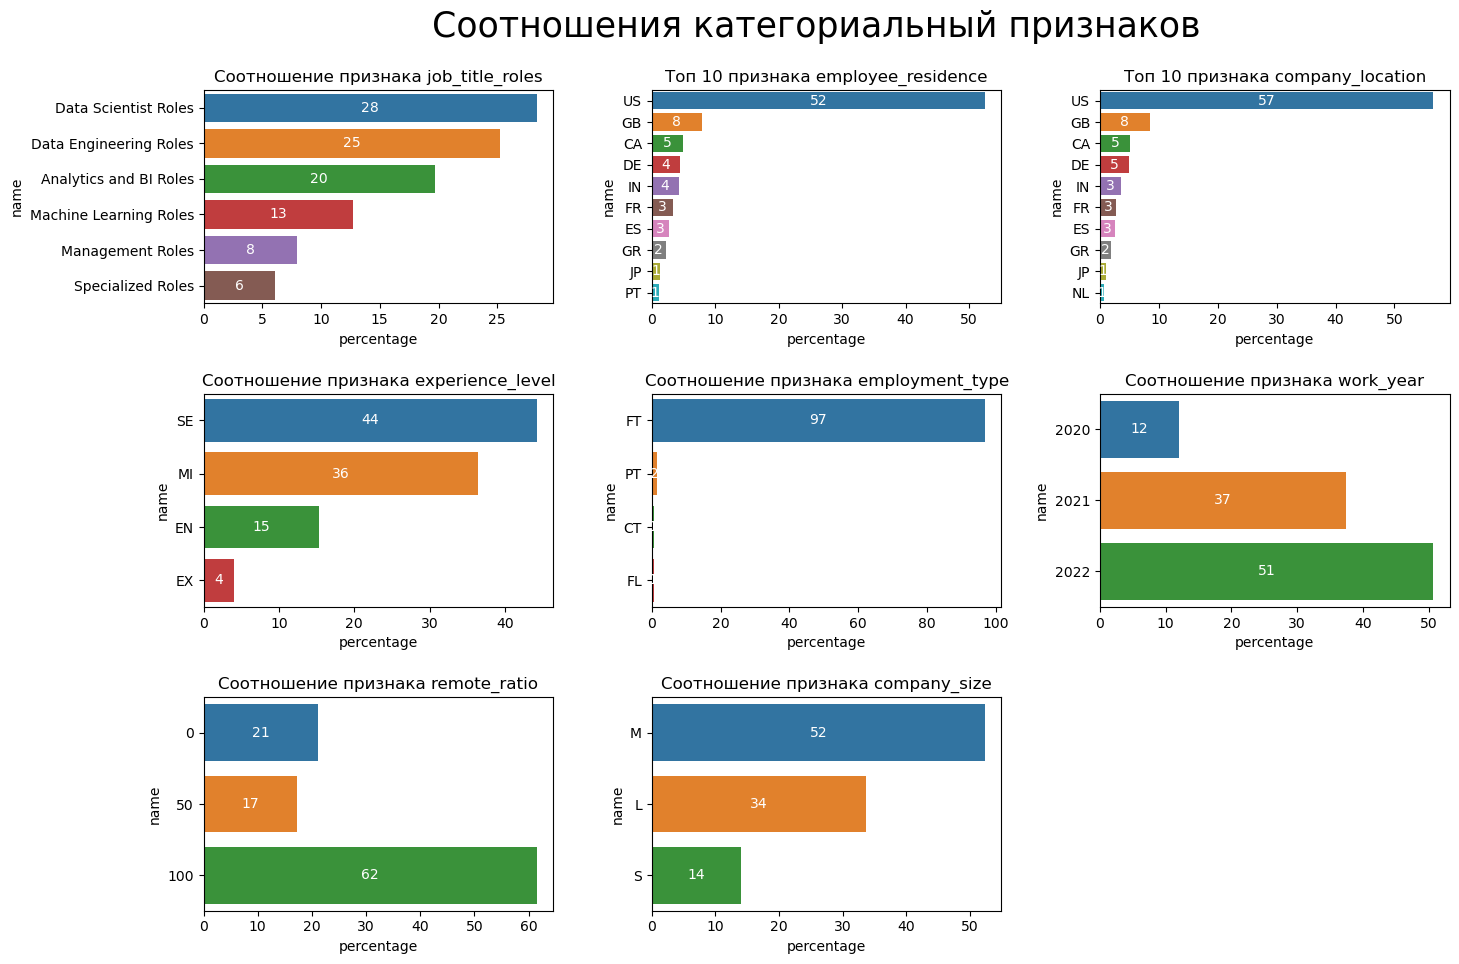

In [9]:
df_for_this_cell = df.copy()

list_unique_cat_cols = ['job_title_roles', 'employee_residence', 'company_location', 'experience_level', 'employment_type', 'work_year', 'remote_ratio', 'company_size']

nrows = (len(list_unique_cat_cols) + 2) // 3 
fig, ax = plt.subplots(ncols=3, nrows=nrows, figsize=(14, 10))

plt.suptitle('Соотношения категориальный признаков').set_fontsize(25)

fig.tight_layout(pad=4) # расстояние между подграфиками
plt.subplots_adjust(top=0.9) # чтобы заголовок не налезал на графики

# На каждой итерации рисуется график в определённую ячейку: 0-0, 0-1, 0-2, 1-0 и т.д.
for idx, feature in enumerate(list_unique_cat_cols):
    row = idx // 3
    col = idx % 3
    
    # Здесь я добавил срез, чтобы был топ 10, а то там ~50 уникальных элементов.
    # И список столбцов я сортировал как раз по количеству. Сначала идут 3 больших, а потом 5 мелких.
    if df_for_this_cell[feature].nunique() > 10:
        sns.barplot(data=pd.DataFrame({'name': (df_for_this_cell[feature].value_counts(normalize=True) * 100)[:10].index, 'percentage': (df_for_this_cell[feature].value_counts(normalize=True) * 100)[:10].values}),
                    x='percentage',
                    y='name',
                    ax=ax[row, col],
                    orient='h');
        ax[row, col].set_title(f'Топ 10 признака {feature}')
        ax[row, col].bar_label(ax[row, col].containers[0], fmt='%.f', label_type='center', color='white') # чтобы в столбиках были циферки (center) и они были белыми (white)
        
    else: # то же самое, только без среза для мелких признаков.
        sns.barplot(data=pd.DataFrame({'name': (df_for_this_cell[feature].value_counts(normalize=True) * 100).index, 'percentage': (df_for_this_cell[feature].value_counts(normalize=True) * 100).values}),
                    x='percentage',
                    y='name',
                    ax=ax[row, col],
                    orient='h');
        ax[row, col].set_title(f'Соотношение признака {feature}')
        ax[row, col].bar_label(ax[row, col].containers[0], fmt='%.f', label_type='center', color='white')
    
# Удаляем пустые subplot'ы
for i in range(len(list_unique_cat_cols), nrows*3):
    row = i // 3
    col = i % 3
    fig.delaxes(ax[row, col])

plt.show('png')

P.S. Я придумал признак `job_title_roles` после того, как проанализировал этот график, подумав: "а может как-то обощить, снизив количество представленных профессий?". Но особо ничего не изменилось: порядок и соотношение не шибко изменилось, ну аналитиков чутка стало больше... управленцев на 6% стало больше.. Посмотрите словарь, мб я сейчас критически ошибаюсь, классифицируя направления профессий так топорно, но.. Захотелось.  
P.S.2. Спустя пару дней размышлений, я всё же решил отбросить подобную категоризацию и буду просто анализировать по 3 наиболее популярным направлениям профессий: DS, DE, DA.

В топе признака `job_title` преобладают саентисты, инженеры и аналитики, а так же МЛ инженеры.  

В признаках `страны проживания` и `страны расположения компании` практически равномерно лидируют 8 стран, с преобладающим большинством в `США`. И это означает, что где живут - там и работают.)

В признаке `опыта` преобладают позиции сеньора и мида, джунов четверть и директорских должностей всего 4% записей.

Признаки `тип трудоустройства` и `remote_ratio`, на мой взгляд, характеризуют одну и ту же категорию. Но, вероятней всего, `тип трудоустройства` отображает юридическую сторону категории, типа все мы устраиваемся на полный рабочий день, а потом вась вась с командой и начальником, и вот мы уже попадаем в признак `remote_ratio` с 50%-й удалёнкой. А со временем и >80%. Потому, видимо, 61% записей принадлежит лежащим на диване чётким челикам.))

И, кстати, признак `год` нам как раз и говорит об этом. В 20-м году долбанула корона, все охренели и резко задумались о каком-то удалённом заработке. И резко начали изучать что-то связанное с компами. В том числе и аналитику/инженерию данных. Думаю, что и с другими направлениями, типа "программиста 1С" или всем нужного "сисадмина", тоже наблюдается рост задействованных граждан. Даже я, вон, созрел на "устроиться на работу" в 38 лет.)))

Окей, ну или в эту выборку просто так попало, а на генсовокупности другие соотношения. Но я буду анализировать, как будто у нас сейчас идентичные генсовокупности соотношения в данных.

Ну и признак `размер компании` нам говорит о том, что большинство работает либо в средних, либо в больших компаниях. Ну и 14% в мелких.. Стартапы мб. Я пока не разбираюсь в размерах компаний.

[↑ contents](#contents)

<h3 id='meansalbyft'>Визуализация среднего годового дохода в зависимости от признаков</h3>опыт работы, год, размер компании

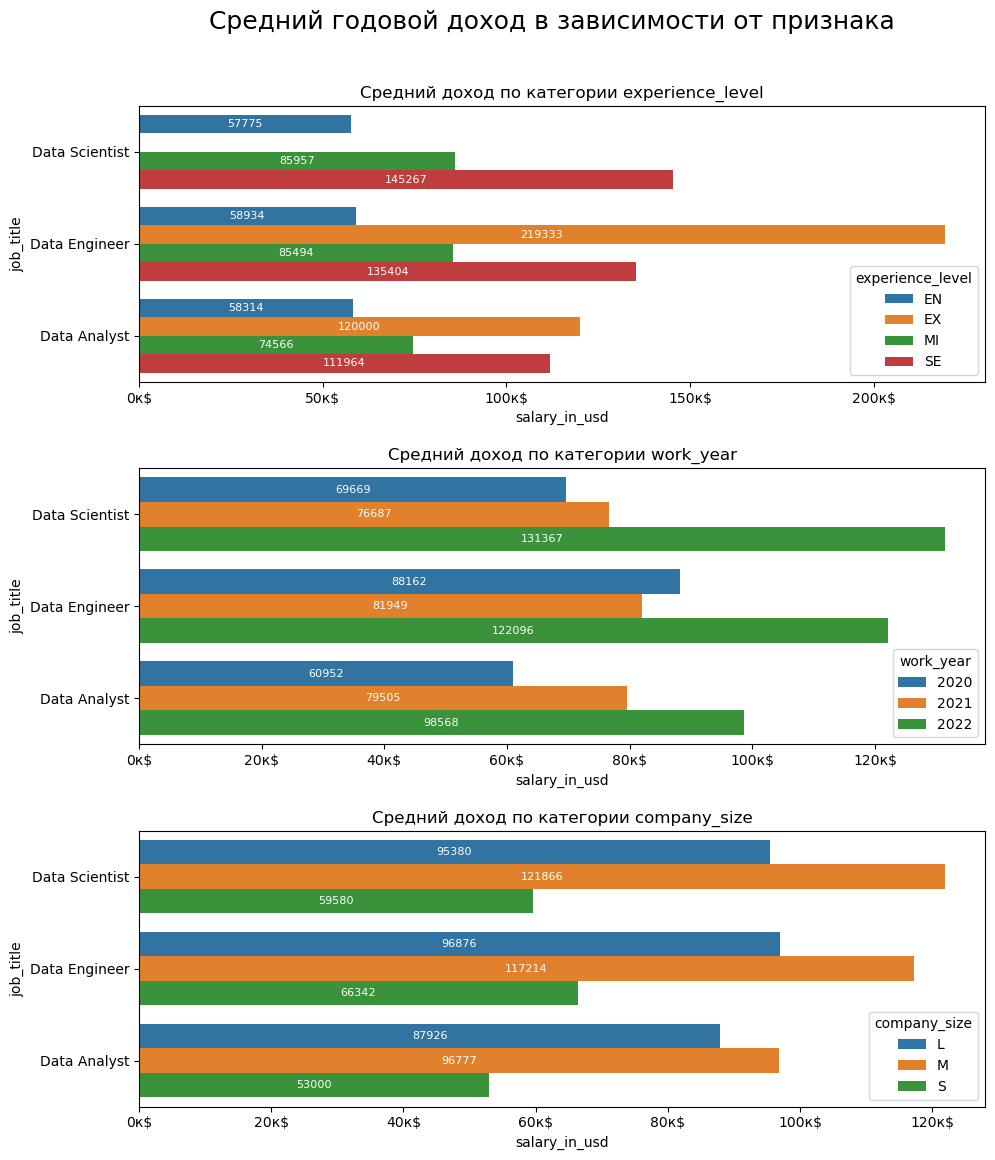

In [11]:
# Ячейку можно и нужно свернуть, чтоб видеть только вывод. Если мелко - ctrl(win)/command(mac) + B (если vscode)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

choose_job = 'job_title' # здесь можно выбрать job_title_roles
list_of_freq_job = list(df[choose_job].value_counts()[:3].index) # и тут поменять 3 на 6.

list_for_this_cell = ['experience_level', 'work_year', 'company_size'] # перечень столбцов для hue.

plt.suptitle('Средний годовой доход в зависимости от признака').set_fontsize(18)

fig.tight_layout(pad=4) # расстояние между подграфиками.
plt.subplots_adjust(top=0.9) # чтобы заголовок не налезал на графики.

row = 0

for i in list_for_this_cell: # цикл по перечню hue.
    
    # фильтр по наиболее популярным направлениям и группировка по заданным столбцам.
    loop_df = df.loc[df[choose_job].isin(list_of_freq_job), :].reset_index(drop=True).groupby([choose_job, i])['salary_in_usd'].mean().reset_index()
    
    sns.barplot(data=loop_df,
                x='salary_in_usd',
                y=choose_job,
                hue=i,
                order=list_of_freq_job,
                ax=ax[row],
                orient='h')
    ax[row].set_title(f'Средний доход по категории {i}')
    [ax[row].bar_label(i, fmt='%.f', label_type='center', fontsize=8, color='white') for i in ax[row].containers]
    
    # Чтоб по цифры отображались в к$. Гпт форева.
    ax[row].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}к$'))
        
    row += 1
    
plt.show('png')

Итак. Данные 3 графика нам говорят о том, что..  
* да, зарплата зависит от опыта работы и сеньоры получают в 2 раза больше джунов;
* зарплата зависит от года, но скорее она зависит от ситуации в мире, которая с каждым годом всё накаляется;
* и, конечно же, зарплата зависит от размера компании.. но тут интересно: по зряплате большие компании уступают средним, а мелкие - мелкие.)))


[↑ contents](#contents)

<h3 id='dynameansalbyft'>Динамика среднего годового дохода в зависимости от признаков</h3>опыт работы, год, размер компании

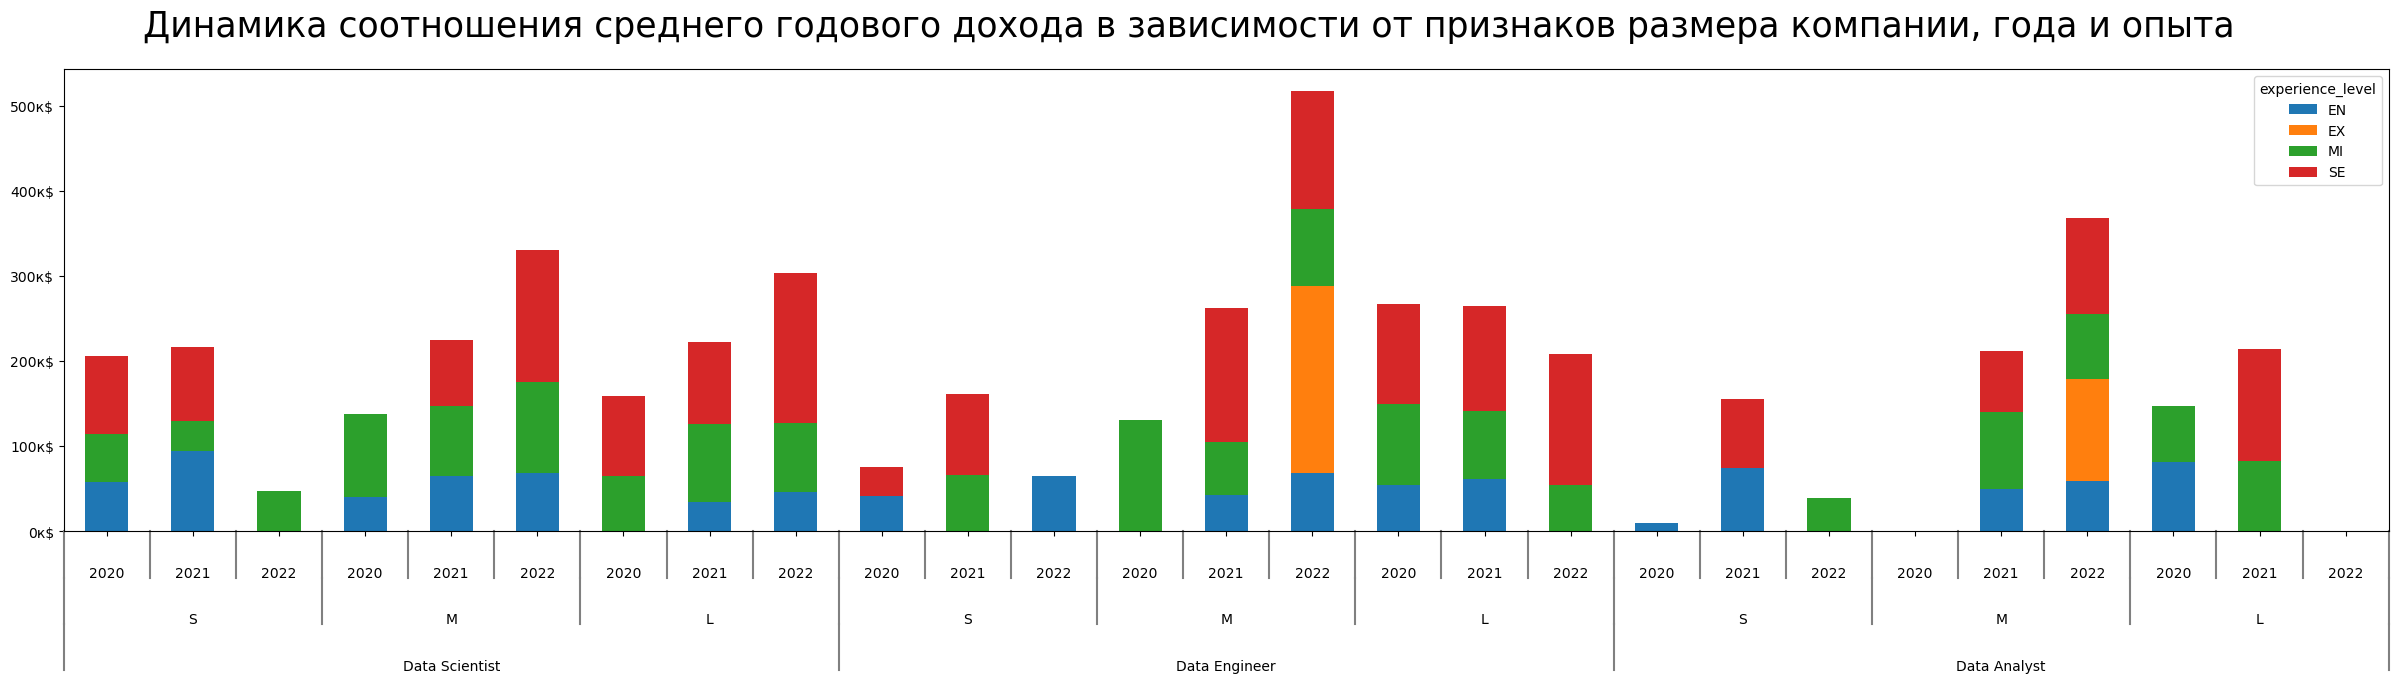

In [12]:
# Вы знаете, что делать. Если мелко - ctrl(win)/command(mac) + B (если vscode)
fig, ax = plt.subplots(figsize=(30, 6))

plt.suptitle('Динамика соотношения среднего годового дохода в зависимости от признаков размера компании, года и опыта').set_fontsize(25)

choose_job = 'job_title' # Здесь можно поменять на job_title_roles, но тогда рекомендую поставить
# Топ 10 значений выбранного столбца.
list_of_freq_job = list(df[choose_job].value_counts()[:3].index) # вот тут 6 вместо 3.

# В этом абзаце кода происходит группировка и сортировка.
df_for_this_cell = df.copy()
df_for_this_cell[choose_job] = pd.Categorical(df_for_this_cell[choose_job], categories=list_of_freq_job, ordered=True)
df_for_this_cell = df_for_this_cell.groupby([choose_job, 'company_size', 'work_year', 'experience_level'])['salary_in_usd'].mean().unstack().sort_values(by=[choose_job, 'company_size'], ascending=[True, False])

df_for_this_cell.plot(kind='bar', ax=ax, stacked=True)

# Чтоб по цифры отображались в к$. Гпт форева.
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}к$'))

ax.set_xticklabels('') # удаление названий по оси х.
ax.set_xlabel('')
label_group_bar_table(ax, df_for_this_cell)

plt.show('png')

Вот интересный график, который нам много о чём говорит.
* например о том, что к 22 году джуны и сеньоры направления DS покинули компании размера S и отдали предпочтение компаниям размера M и L. К 22 году общий объем зарплат в компаниях размера M и L растёт по экспоненте;
* примерно та же ситуаци и у инженеров: компании размера S к 22 году стали не интересными и люди предпочли компании размера M и L. В компаниях размера L наблюдается спад специалистов данного направления;
* у аналитиков ситуация хуже, чем у соседей по графику. Компании размера S как не были особо популярными, так ими и остались. Компании L к 22 году - вымерли.))) И наблюдается рост джунов, и сеньоров в компаниях размера M, с появлением управляющего состава EX.

[↑ contents](#contents)

<h3 id='compemploc'>Соотношение между тем, где расположена компания и тем, где проживает специалист</h3>

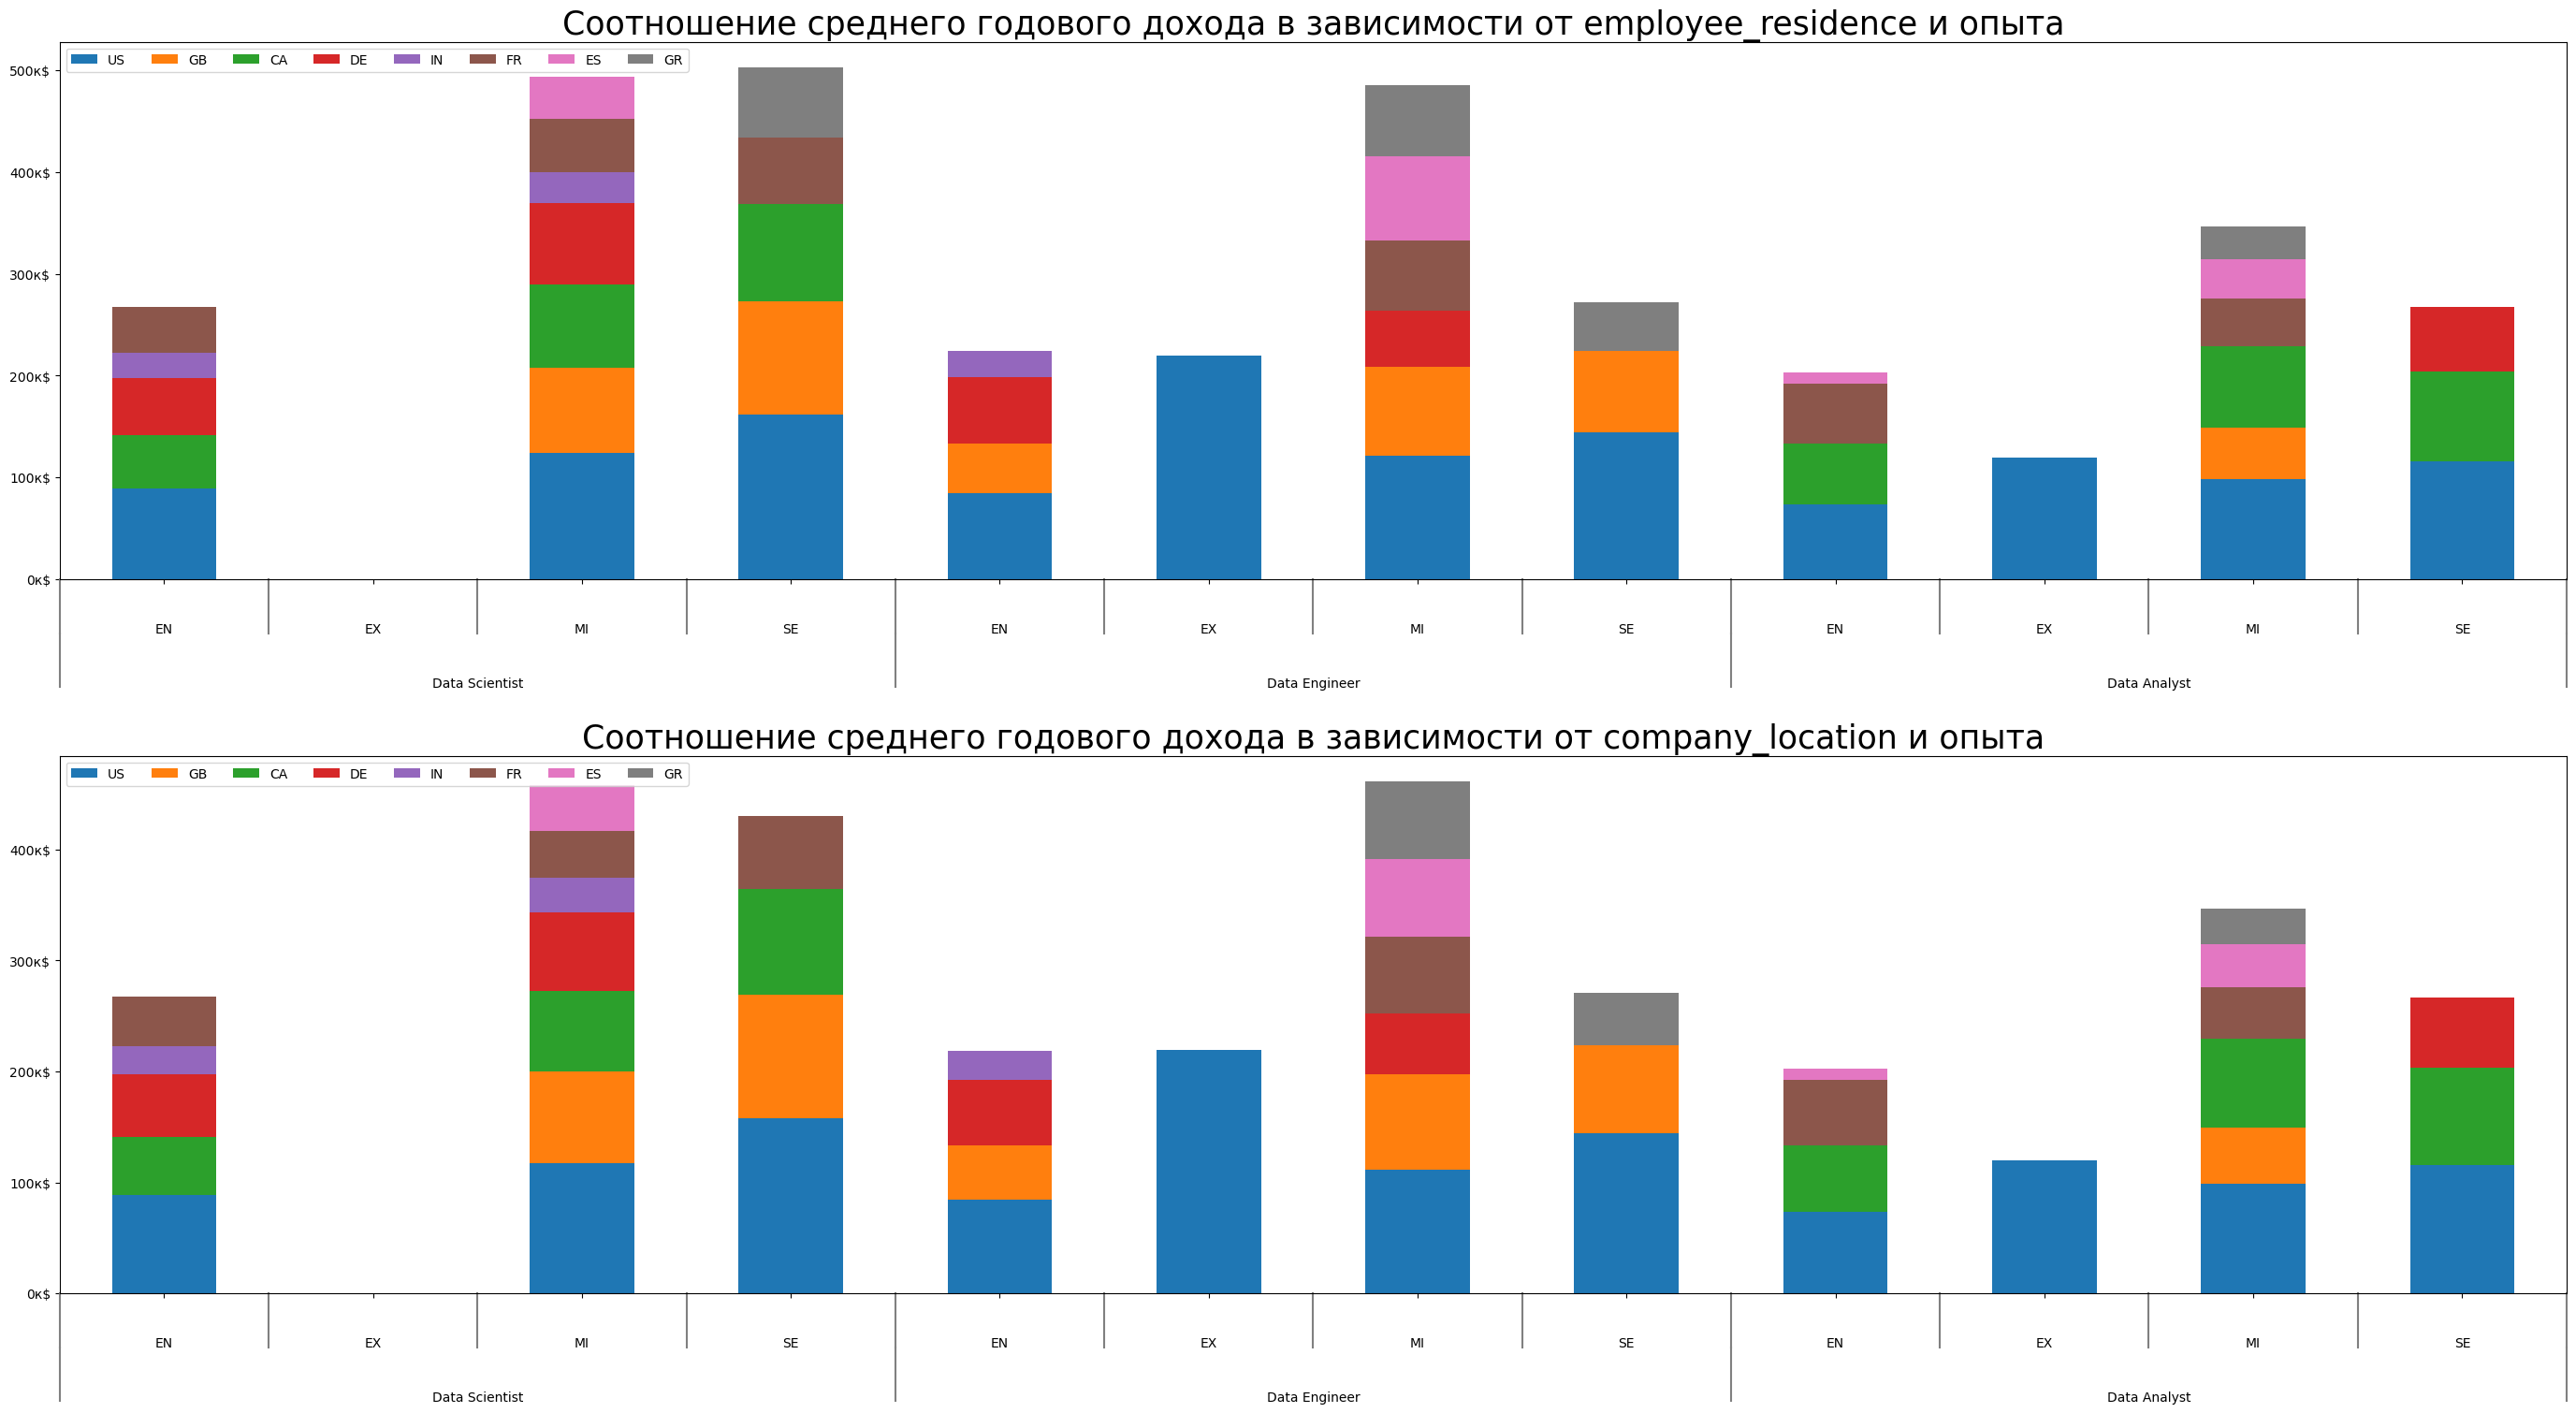

In [13]:
# Если мелко - ctrl(win)/command(mac) + B (если vscode)
# Код +/- тот же, что и в ячейке выше, что и в ячейке ниже.
# Можно поменять job_title и число среза.
# Так же добавилась сортировка по столбцу hue: страна проживания.
df_for_this_cell = df.copy()

choose_job = 'job_title'
list_of_freq_job = list(df[choose_job].value_counts()[:3].index)
df_for_this_cell[choose_job] = pd.Categorical(df_for_this_cell[choose_job], categories=list_of_freq_job, ordered=True)

list_of_locations = ['employee_residence', 'company_location']

fig, ax = plt.subplots(nrows=2, figsize=(30, 15))

fig.tight_layout(pad=10) # расстояние между подграфиками.
plt.subplots_adjust(top=1) # чтобы заголовок не налезал на графики.

for idx, val in enumerate(list_of_locations):
    
    ax[idx].set_title(f'Соотношение среднего годового дохода в зависимости от {val} и опыта').set_fontsize(25)
    loop_df = df_for_this_cell.copy()
    
    loop_list = list(df[val].value_counts()[:8].index)
    
    # Группировка и стройка графика
    loop_df[val] = pd.Categorical(loop_df[val], categories=loop_list, ordered=True)
    loop_df = loop_df.groupby([choose_job, 'experience_level', val])['salary_in_usd'].mean().unstack()
    
    loop_df.plot(kind='bar', ax=ax[idx], stacked=True, legend=True) #<-- тут можно разстакнуть
    
    ax[idx].legend(loc='upper left', ncol=len(loop_df.columns)) # чтоб легенда была горизонтальной.
    
    # Чтоб по цифры отображались в к$. Гпт форева.
    ax[idx].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}к$'))
    
    ax[idx].set_xticklabels('') # удаление названий по оси х
    ax[idx].set_xlabel('')
    label_group_bar_table(ax[idx], loop_df)

plt.show('png')

Эти 2 графика я построил просто так, они показывают только то, что где живут ребятки, там и работают, как я и предполагал ранее.  
Основное количество народа располагается в США. Саентисты и аналитики водятся в Канаде. Саентисты не водятся в Греции. (может и водятся, у меня 8 топ стран, не забываем)  
Далее что.. Французы присутствуют везде, как и британцы, как и немцы, и испанцы.  
Что интересно - специалисты из Индии присутствуют в нашем топе. Красавцы. Составляют конкуренцию всем этим англосаксам.))) хахахахаха

Почему я решил это отобразить вот так, не знаю, потому что. Бесспорно можно было проще проверить гипу про "где живёт - там и работает".

[↑ contents](#contents)

<h3 id='remotedyna'>Динамика по формату занятости</h3>

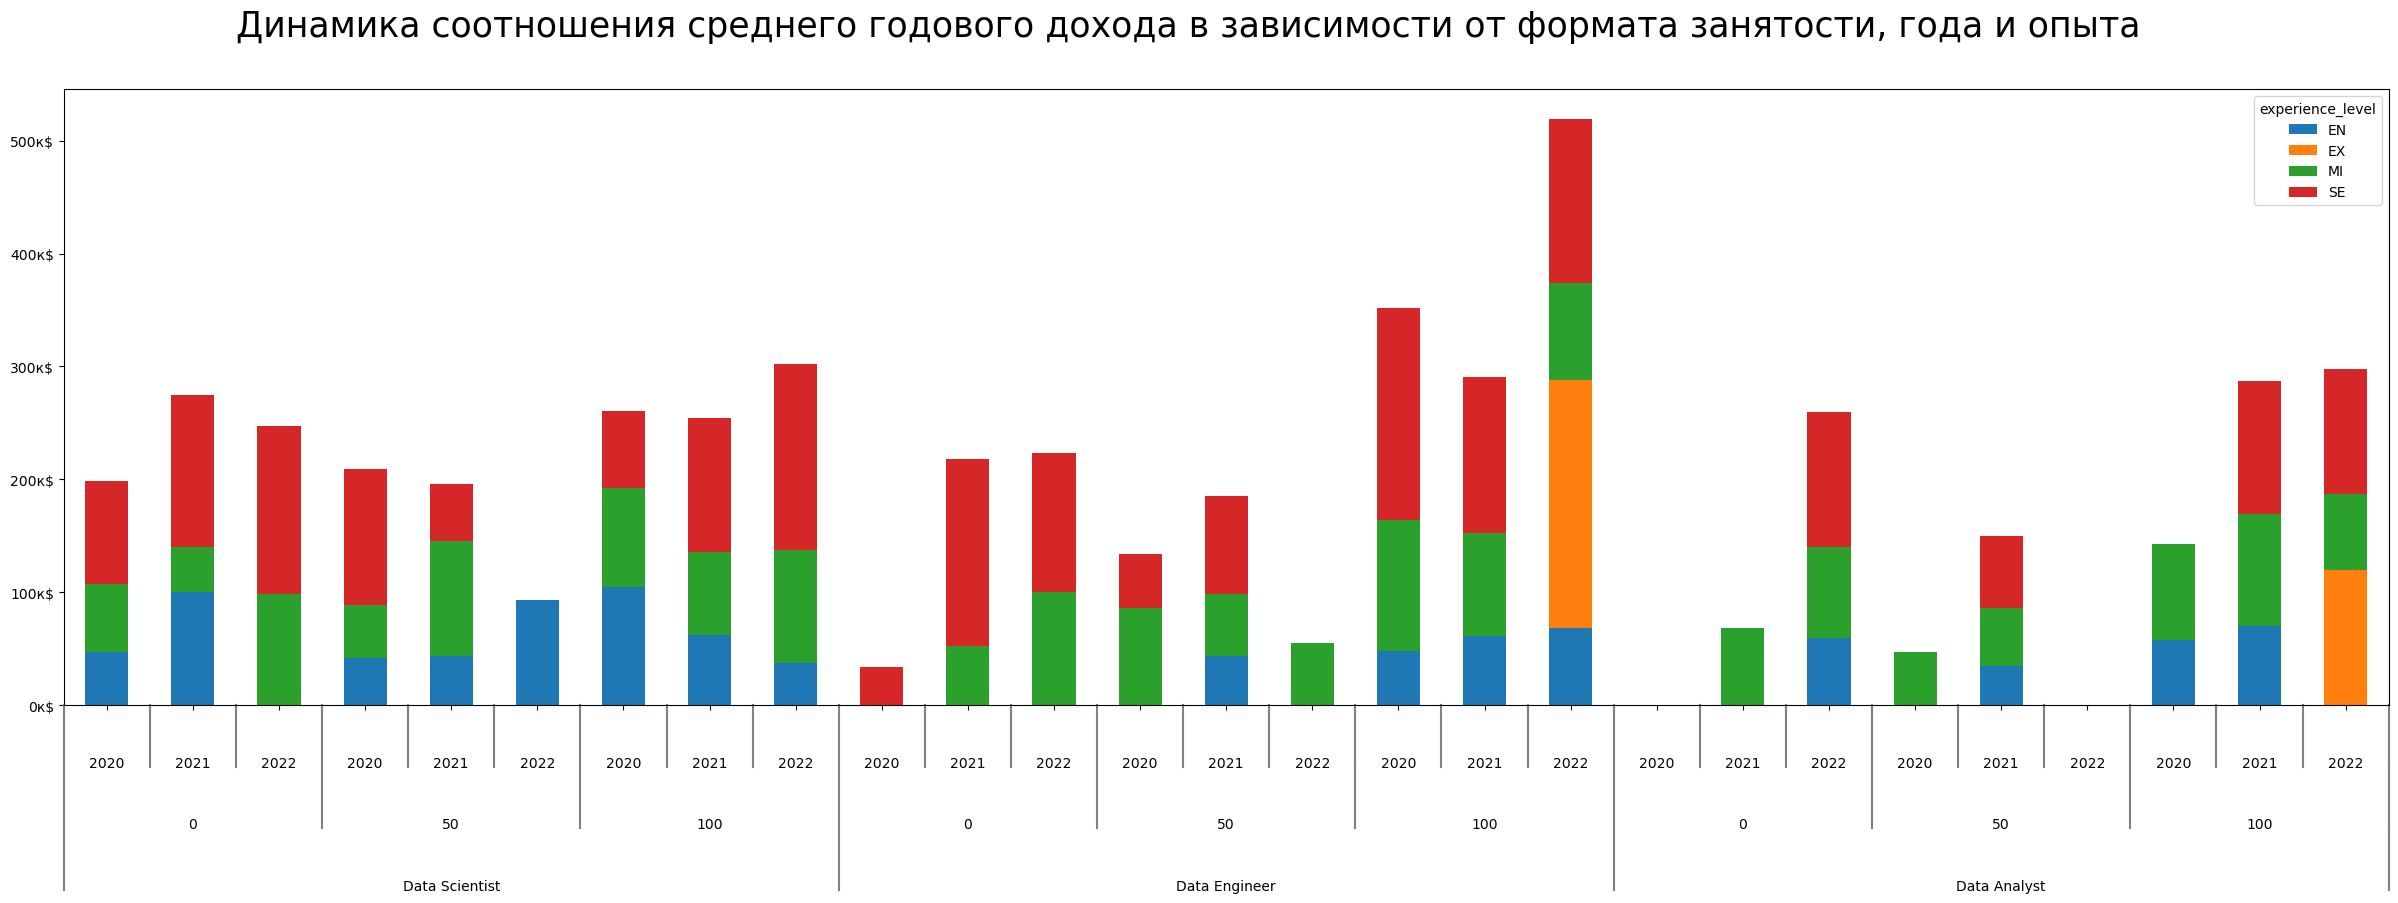

In [14]:
# Если мелко - ctrl(win)/command(mac) + B (если vscode)
fig, ax = plt.subplots(figsize=(30, 8))

plt.suptitle('Динамика соотношения среднего годового дохода в зависимости от формата занятости, года и опыта').set_fontsize(25)

choose_job = 'job_title'
list_of_freq_job = list(df[choose_job].value_counts()[:3].index)

# В этом абзаце кода происходит группировка и сортировка
df_for_this_cell = df.copy()
df_for_this_cell[choose_job] = pd.Categorical(df_for_this_cell[choose_job], categories=list_of_freq_job, ordered=True)

df_for_this_cell = df_for_this_cell.groupby([choose_job, 'remote_ratio', 'work_year', 'experience_level'])['salary_in_usd'].mean().unstack()

df_for_this_cell.plot(kind='bar', ax=ax, stacked=True, legend=True)

# Чтоб по цифры отображались в к$. Гпт форева.
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}к$'))

ax.set_xticklabels('') # удаление названий по оси х
ax.set_xlabel('')
label_group_bar_table(ax, df_for_this_cell)

plt.show('png')

Так, тут у нас удалёночка. Удалёнка ценится у всех.) Особенно у инженеров.)) Но наблюдается спад зарплат (не беру в расчёт управляющий состав EX).  

И давайте наверное общий подвывод по пункту 2?

Динамика наша с вами мировой обстановки мощно катализирует все сферы деятельности человека. В частности, нашего с вами направления изучения и работы с данными. Количество специалистов с каждым годом растёт. С общей положительной динамикой годовых зарплат. Потолок в 55 тыщ уе в месяц мотивирует заниматься данным направлением. Я гуглил, когда сравнивал названия профессий для категорий. Там реально по 100-120 тыщ в год в среднем. С уникумами по полляма бачинских в год. Тема. 

Так, ну что, шапироуилкать пора!))

Гляньте изюм. Value_Counts по категориям.) Просто любимка.))

[↑ contents](#contents)

<h3 id='vcyear'>Обычный value_counts по годам</h3>

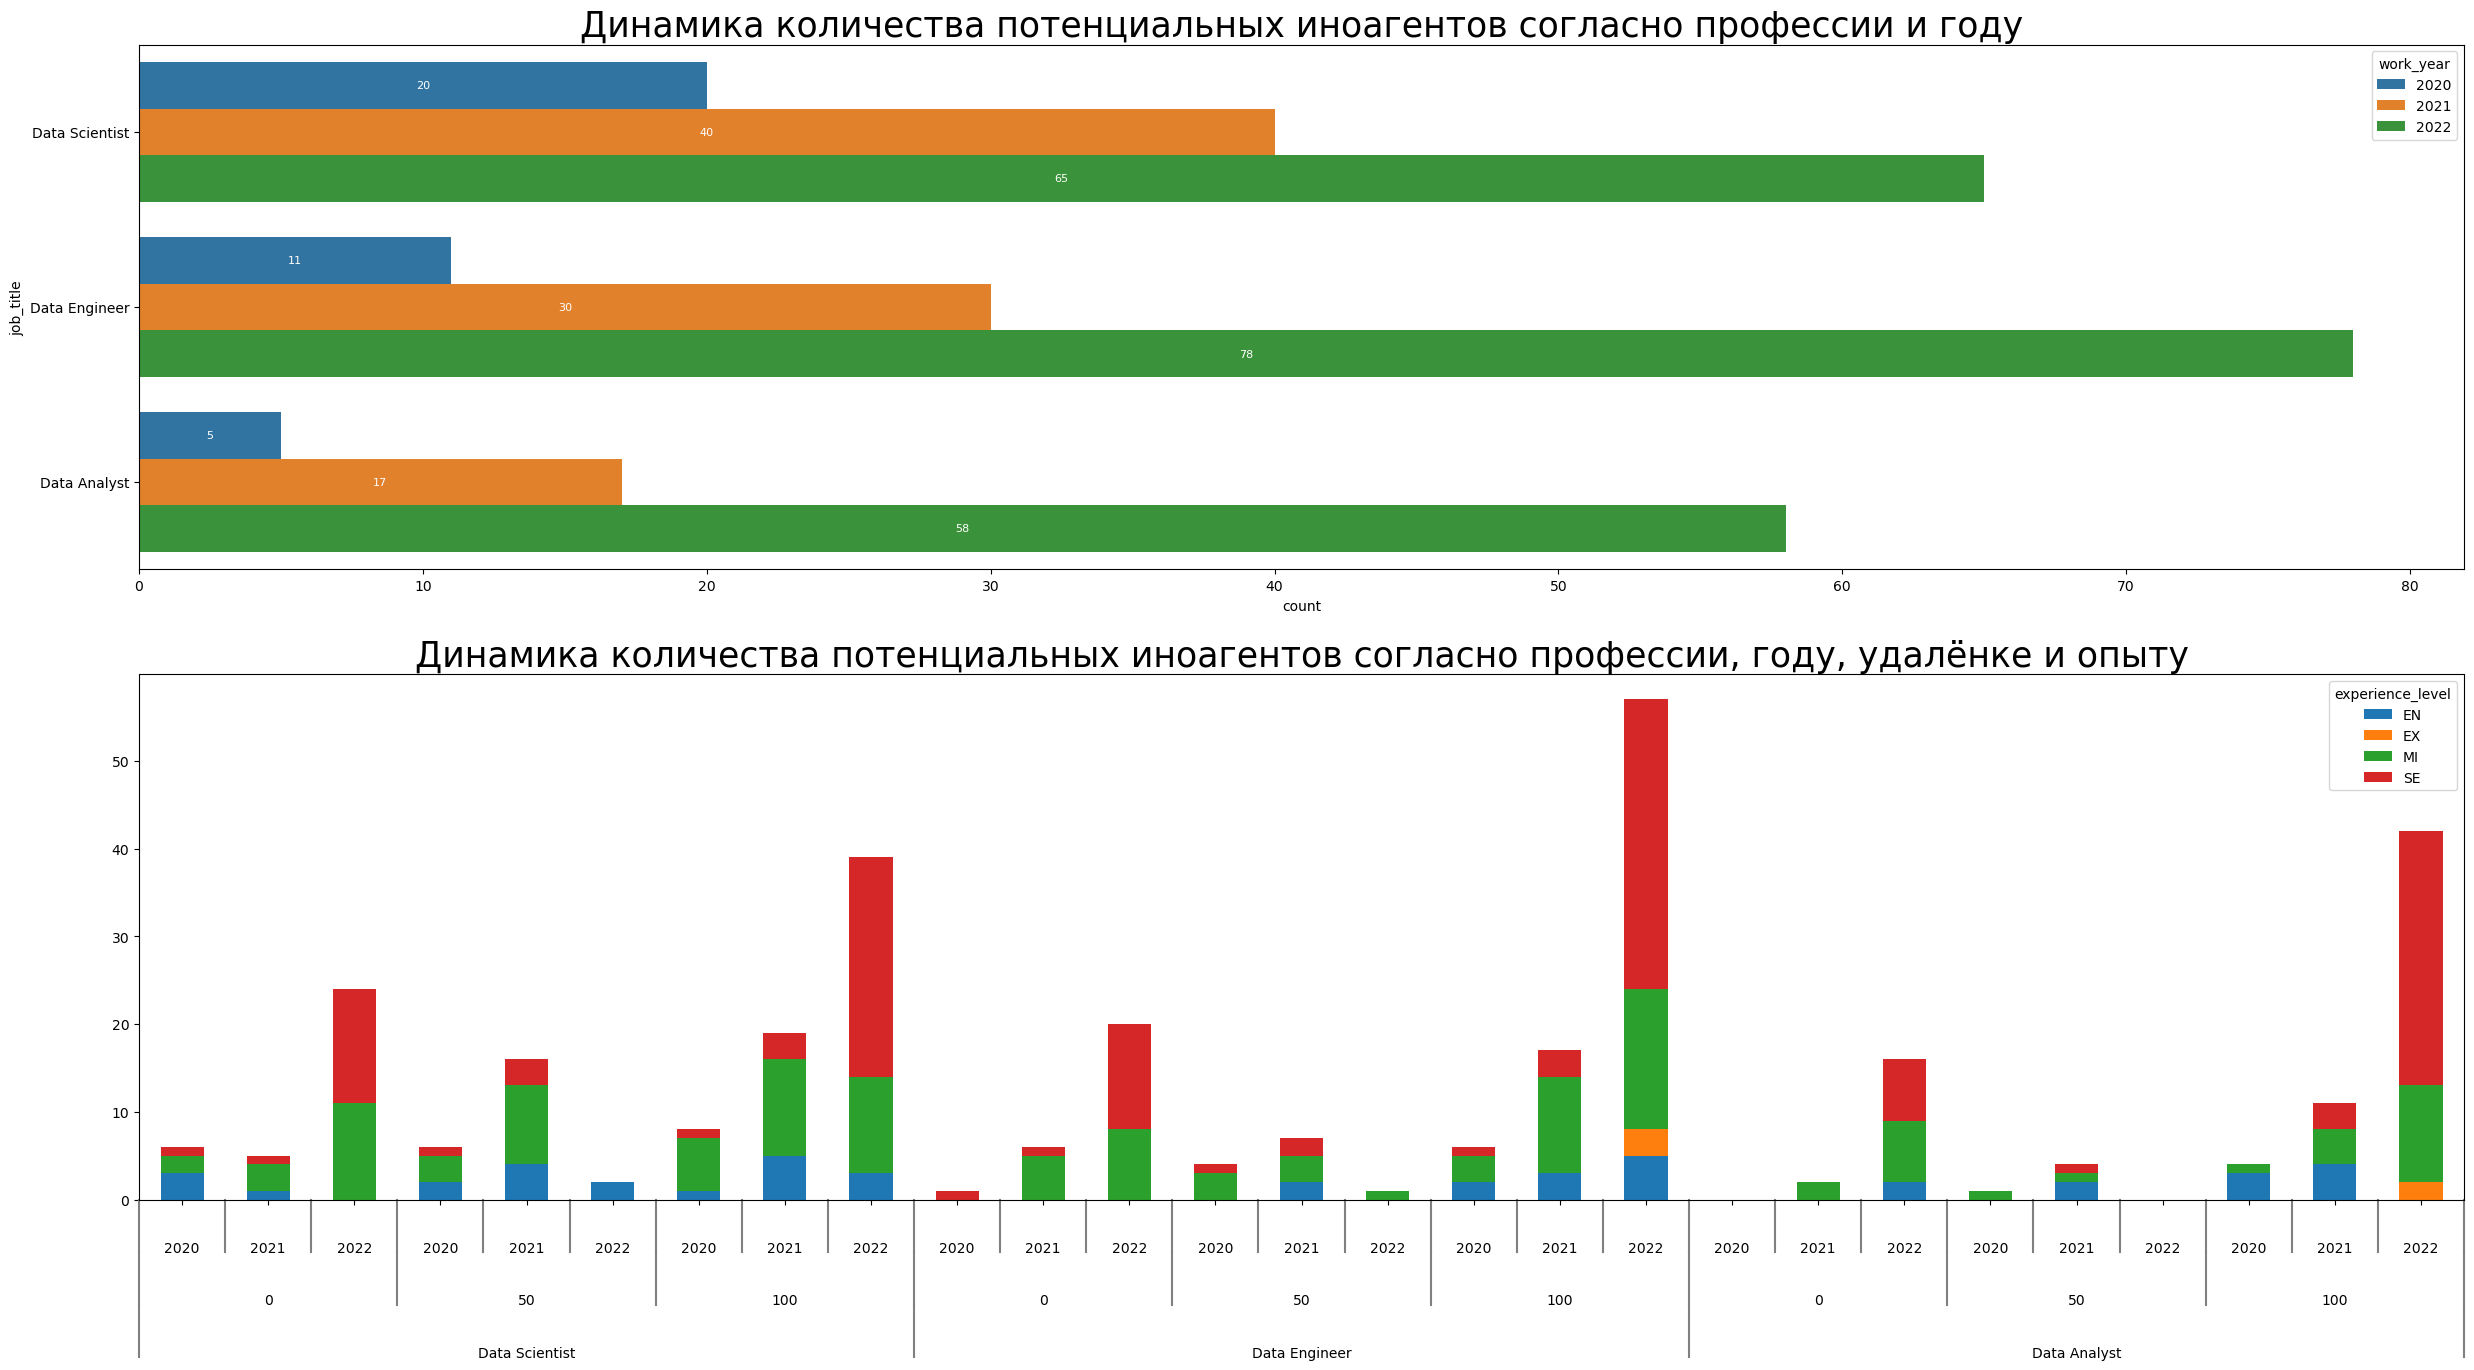

In [15]:
# Если мелко - ctrl(win)/command(mac) + B (если vscode)
choose_job = 'job_title' # Здесь можно поменять на job_title_roles, но тогда рекомендую поставить
# Топ 10 значений выбранного столбца.
list_of_freq_job = list(df[choose_job].value_counts()[:3].index) # вот тут 6 вместо 3.

fig, ax = plt.subplots(nrows=2, figsize=(30, 15))
ax[0].set_title('Динамика количества потенциальных иноагентов согласно профессии и году').set_fontsize(25)
ax[1].set_title('Динамика количества потенциальных иноагентов согласно профессии, году, удалёнке и опыту').set_fontsize(25)

df_for_ax_0 = df.loc[df[choose_job].isin(list_of_freq_job), :].reset_index(drop=True).groupby([choose_job, 'work_year']).size().reset_index(name='count').sort_values(by=choose_job, ascending=False)

sns.barplot(data=df_for_ax_0,
            y=choose_job,
            x='count',
            hue='work_year',
            orient='h',
            ax=ax[0])

[ax[0].bar_label(i, fmt='%.f', label_type='center', fontsize=8, color='white') for i in ax[0].containers]

# В этом абзаце кода происходит группировка и сортировка
df_for_ax_1 = df.copy()
df_for_ax_1[choose_job] = pd.Categorical(df_for_ax_1[choose_job], categories=list_of_freq_job, ordered=True)

df_for_ax_1 = df_for_ax_1.groupby([choose_job, 'remote_ratio', 'work_year', 'experience_level']).size().unstack()

df_for_ax_1.plot(kind='bar', ax=ax[1], stacked=True, legend=True)

ax[1].set_xticklabels('') # удаление названий по оси х
ax[1].set_xlabel('')
label_group_bar_table(ax[1], df_for_ax_1)

plt.show('png')

Такой БББАМ!!! сеньоров на удалёнке в 22 году привалило!))

Мне кажется тут всё интуитивно понятно. 

## Статистический анализ данных

Напомню ключевые моменты:

* Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
* Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
* Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
* Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

[↑ contents](#contents)

<h3 id='saluphypo'>Гипотеза о ежегодном росте зп</h3>

Первым идёт вопрос: наблюдается ли ежегодный рост зп у DS спецов?

В нашем датасете присутствует 3 года. Данных о том, проводим ли мы эксперимент для одних и тех же людей - у нас нет.  
Т.к. данных о 2020 годе - наименьшее количество, я буду формировать массивы по другим годам используя `.sample(n=len(`2020 год`))`  
Потому, если получившиеся признаки будут иметь нормальное распределение, то выбор очевиден: однофакторный дисперсионный анализ ANOVA.

|||
|-|-|
|Нулевая $H_{0}$:| ежегодного роста не наблюдается;|
|Альтернативная $H_{1}$:| рост - наблюдается.|

In [16]:
# Выберу из датасета зарплаты дата саентистов по годам.
list_for_this_cell = [df.loc[(df['job_title'] == 'Data Scientist') & (df['work_year'] == i), 'salary_in_usd'].reset_index(drop=True) for i in df['work_year'].unique()]

# Определю минимальный размер массива.
min_for_this_cell = min([len(i) for i in list_for_this_cell])

# Соберу 3 массива из списка в 1 датафрейм, выровняв их по длине наименьшего массива.
df_for_this_cell = pd.concat([pd.Series(list_for_this_cell[0]).sample(min_for_this_cell, ignore_index=True, random_state=42), 
                              pd.Series(list_for_this_cell[1]).sample(min_for_this_cell, ignore_index=True, random_state=42), 
                              pd.Series(list_for_this_cell[2]).sample(min_for_this_cell, ignore_index=True, random_state=42)], 
                             axis=1, keys=df['work_year'].astype(str).unique())

print('Определение ежегодного изменения зарплат специалистов DS:', '\n')

print('ОтШапироВилкаем наши признаки:')
print(shapirowilk(df_for_this_cell)[0], '\n')

print('Т.к. у нас 3 признака, зависимость неизвестна, т.к. нам не известно одни и те же ли это люди.\nПотому будем проводить однофакторный дисперсионный анализ ANOVA:')
p_val_f_oneway = stats.f_oneway(df_for_this_cell['2020'], df_for_this_cell['2021'], df_for_this_cell['2022'])[1]
print('p_value 2020 vs 2021 vs 2022 = %.10f,' % p_val_f_oneway, f'при alpha = {alpha}.', '\n')

print('Вывод:')
print(f"Итак, у нас p-value {'меньше' if p_val_f_oneway < alpha else 'больше'} уровня значимости 0.05, а это значит, что {'мы можем отвергнуть' if p_val_f_oneway < alpha else 'мы не можем отвергнуть'} нулевую гипотезу и сказать,\nчто ежегодно наблюдается рост зарплат для специалистов DS.")


Определение ежегодного изменения зарплат специалистов DS: 

ОтШапироВилкаем наши признаки:
Распределение ['2020', '2021', '2022'] нормальное. При alpha = 0.05 

Т.к. у нас 3 признака, зависимость неизвестна, т.к. нам не известно одни и те же ли это люди.
Потому будем проводить однофакторный дисперсионный анализ ANOVA:
p_value 2020 vs 2021 vs 2022 = 0.0000501051, при alpha = 0.05. 

Вывод:
Итак, у нас p-value меньше уровня значимости 0.05, а это значит, что мы можем отвергнуть нулевую гипотезу и сказать,
что ежегодно наблюдается рост зарплат для специалистов DS.


[↑ contents](#contents)

<h3 id='dsdesalhypo'>Гипотеза о соотношении зарплат DS и DE</h3>

Далее идёт вопрос: как соотносятся зарплаты DS и DE в 2022 году? 

Я думаю, это означает, что стоит проверить эти 2 массива на равенство и на кто кого больше.

|||
|-|-|
|Нулевая $H_{0}$:| зарплаты равны;|
|Альтернативная $H_{1}$:| зарплаты не равны.|
|||
|Нулевая $H_{0}$:| DS <= DE;|
|Альтернативная $H_{1}$:| DS > DE.|
|и наоборот.)||

Признаки распределены не нормально, признаки независимы, признака 2. Используем U-критерий Манна-Уитни.

In [17]:
# С вашего позволения я снова сделаю через список объектов series и concat.
# DS и DE находятся в value_counts по срезу [:2].index.
# Тут важно прописывать reset_index, иначе concat будет кривой.
list_for_this_cell = [df.loc[(df['job_title'] == i), 'salary_in_usd'].reset_index(drop=True) for i in df['job_title'].value_counts()[:2].index]

# Определю минимальный размер массива.
min_for_this_cell = min([len(i) for i in list_for_this_cell])

df_for_this_cell = pd.concat([pd.Series(list_for_this_cell[0]).sample(min_for_this_cell, random_state=42, ignore_index=True),
                              pd.Series(list_for_this_cell[1]).sample(min_for_this_cell, random_state=42, ignore_index=True)],
                             axis=1, keys=df['job_title'].value_counts()[:2].index)

print('Соотношение зарплат специалистов Data Science и Data Engineer:', '\n')

# ПроШапироВилкаем признаки.
print('ШапироВилканье:')
print(shapirowilk(df_for_this_cell)[0], '\n')

print('Проводим U-критерий Манна-Уитни:')
print('p_value H1: DS != DE = %.10f,' % stats.mannwhitneyu(df_for_this_cell['Data Scientist'], df_for_this_cell['Data Engineer'])[1])
#print('p_value H1: DS < DE = %.10f' % stats.mannwhitneyu(df_for_this_cell['Data Scientist'], df_for_this_cell['Data Engineer'], alternative='less')[1])
#print('p_value H1: DS > DE = %.10f' % stats.mannwhitneyu(df_for_this_cell['Data Scientist'], df_for_this_cell['Data Engineer'], alternative='greater')[1])
print()

print('Вывод:')
print('Чтож, я закомментил 2 строчки, которые выясняют кто кого больше, т.к', '\n', 'тест на равенство показывает нам, что мы не можем отвергуть H0.', '\n', 'Зарплаты специалистов по этим двум направлениям не особо то и отличаются, как оказалось.)')


Соотношение зарплат специалистов Data Science и Data Engineer: 

ШапироВилканье:
Распределение ['Data Scientist', 'Data Engineer'] не нормальное. При alpha = 0.05 

Проводим U-критерий Манна-Уитни:
p_value H1: DS != DE = 0.6098373788,

Вывод:
Чтож, я закомментил 2 строчки, которые выясняют кто кого больше, т.к 
 тест на равенство показывает нам, что мы не можем отвергуть H0. 
 Зарплаты специалистов по этим двум направлениям не особо то и отличаются, как оказалось.)


[↑ contents](#contents)

<h3 id='compsizedssal'>Гипотеза о соотношении зарплат DS в компаниях разных размеров</h3>

Третьим пунктом нашего перечня ключевых моментов идёт вопрос:  
Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

Снова сделаю 3 целевых массива.  
Тут есть один нюанс: в самой маленькой выборке, это у нас компании ранга S, т.е. маленькие компании - всего 18 записей.  

И тут 2 варианта:
- либо просто конкатить и заполнять пропуски средним значением по столбцу,
- либо использовать `.sample()` и подстраивать другие выборки под размер наименьшей.

В первом варианте: признаки получаются непараметрическими и следует использовать `критерий Краскела-Уоллиса` для 3-х и `U-критерий Манна-Уитни` для 2-х  переменных.  
А во втором - распределение признаков получается нормальным и я применил соответствующие тесты.

И чтобы вывод получился одинаковым, я взял второй вариант и `random_state = 1`. Повторюсь: выборка маленькая, хочется данных по-больше.

Гипотезы:

||Нулевая $H_{0}$:|Альтернативная $H_{1}$:|
|-|-|-|
|Для критерия Краскела-Уоллиса:|зарплаты S == M == L;|зарплаты S != M != L.|
||||
|Для U-критерия Манна-Уитни:|M <= S;|M > S.|
||M <= L|M > L|
||L <= S|L > S|

In [18]:
# Способ получения необходиммых массивов оставлю таким же.
list_for_this_cell = [df.loc[(df['job_title'] == 'Data Scientist') & (df['company_size'] == i), 'salary_in_usd'].reset_index(drop=True) for i in df['company_size'].sort_values(ascending=False).unique()]

min_for_this_cell = min([len(i) for i in list_for_this_cell])

df_for_this_cell = pd.concat([pd.Series(list_for_this_cell[0]).sample(min_for_this_cell, ignore_index=True, random_state=1),
                              pd.Series(list_for_this_cell[1]).sample(min_for_this_cell, ignore_index=True, random_state=1),
                              pd.Series(list_for_this_cell[2]).sample(min_for_this_cell, ignore_index=True, random_state=1)],
                             axis=1, keys=df['company_size'].sort_values(ascending=False).unique())

print('Соотношение зарплат специалистов Data Science в компаниях различных размеров:', '\n')

# ПроШапироВилкаем признаки.
print('ШапироВилканье:')
print(shapirowilk(df_for_this_cell)[0], '\n')

print('Проводим однофакторный дисперсионный анализ ANOVA:')
print('p_value H1: (S != M != L) = %.15f,' % stats.f_oneway(df_for_this_cell['S'], df_for_this_cell['M'], df_for_this_cell['L'])[1], f'при alpha = {alpha}.')

print()
print('А теперь проведём двухвыборочный t-критерий, чтоб определить кто кого больше:')
print('p_value H1: (M > S) = %.15f,' % stats.ttest_ind(df_for_this_cell['S'], df_for_this_cell['M'], alternative='less')[1], f'при alpha = {alpha}.')
print('p_value H1: (M > L) = %.15f,' % stats.ttest_ind(df_for_this_cell['L'], df_for_this_cell['M'], alternative='less')[1], f'при alpha = {alpha}.')
print('p_value H1: (L > S) = %.15f,' % stats.ttest_ind(df_for_this_cell['S'], df_for_this_cell['L'], alternative='less')[1], f'при alpha = {alpha}.')
print()

print('Вывод:')
print('Во всех 4-х случаях можно отвергнуть H0 и сказать что:', '\n', '- в компаниях разных размеров зп специалистов DS - разная;', '\n', '- в компаниях размера М зп выше, чем в компаниях размера S и L;', '\n', '- в компаниях размера L зп выше, чем в компаниях размера S.')

Соотношение зарплат специалистов Data Science в компаниях различных размеров: 

ШапироВилканье:
Распределение ['S', 'M', 'L'] нормальное. При alpha = 0.05 

Проводим однофакторный дисперсионный анализ ANOVA:
p_value H1: (S != M != L) = 0.000008092453927, при alpha = 0.05.

А теперь проведём двухвыборочный t-критерий, чтоб определить кто кого больше:
p_value H1: (M > S) = 0.000000064146813, при alpha = 0.05.
p_value H1: (M > L) = 0.024784763435942, при alpha = 0.05.
p_value H1: (L > S) = 0.002041160328212, при alpha = 0.05.

Вывод:
Во всех 4-х случаях можно отвергнуть H0 и сказать что: 
 - в компаниях разных размеров зп специалистов DS - разная; 
 - в компаниях размера М зп выше, чем в компаниях размера S и L; 
 - в компаниях размера L зп выше, чем в компаниях размера S.


[↑ contents](#contents)

<h3 id='dsdeconncoomsize'>Гипотеза о связи между наличием должностей DS и DE, и размером компании</h3>

Последним из ключевых моментов является вопрос:  
Есть ли связь между наличием должностей `Data Scientist` и `Data Engineer` и размером компании?

На самом деле странный вопрос. Я так до конца и не понял, что нужно сделать и что я вообще должен посчитать.

Спросив совета в пачке, я понял, что я считаю `value_counts` по размеру компании для 2 профессий. И как мне этот валью каунтс скажет о взаимосвязи наличия должностей и размером? ... наличие должностей... и размер... наличие должностей.. и размер.. Нет, я так ничего и не понял. А может и понял... Короче. Просто посчитаю `p_value` хи квадрата.

|||
|-|-|
|Нулевая $H_{0}$:| связи нет;|
|Альтернативная $H_{1}$:| связь есть.|

Есть ли связь между наличием должностей DS и DE, и размером компании? 

Проводим тест хи-квадрат для категориальных признаков:
p_value (H1: связь есть) = 0.0178, при alpha = 0.05. 

Вывод: 
 p_value нам говорит о том, что мы можем отвернуть H0 и сказать, 
 что связь между наличием должностей DS и DE, и размером компании - есть.


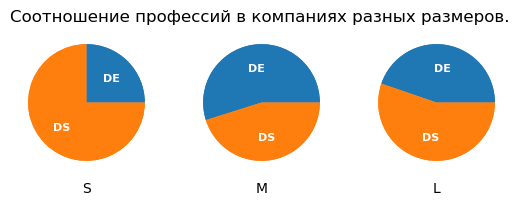

In [19]:
print('Есть ли связь между наличием должностей DS и DE, и размером компании?', '\n')
print('Проводим тест хи-квадрат для категориальных признаков:')
print('p_value (H1: связь есть) = %.4f,' % stats.chi2_contingency(df.loc[(df['job_title'] == 'Data Scientist') | (df['job_title'] == 'Data Engineer'), :].groupby(['job_title', 'company_size']).size().unstack())[1], f'при alpha = {alpha}.', '\n')
print('Вывод:', '\n', 'p_value нам говорит о том, что мы можем отвернуть H0 и сказать,', '\n', 'что связь между наличием должностей DS и DE, и размером компании - есть.')

df_for_this_cell = df.loc[(df['job_title'] == 'Data Scientist') | (df['job_title'] == 'Data Engineer'), :].groupby(['job_title', 'company_size']).size().unstack().sort_index(ascending=False, axis=1).rename({'Data Engineer': 'DE', 'Data Scientist': 'DS'}, axis=0)

ax = df_for_this_cell.plot(kind='pie', subplots=True, legend=False, labels=None);

for i in range(len(ax)):
    ax[i].set_xlabel(ax[i].get_ylabel())
    ax[i].set_ylabel('')
    wedges, text, autotexts = ax[i].pie(df_for_this_cell.iloc[:, i], labels=df_for_this_cell.index, autopct='%1.1f%%', textprops=dict(color="w"))
    for j in range(len(autotexts)):
        autotexts[j].set_text(text[j].get_text())
    plt.setp(autotexts, size=8, weight="bold")

plt.title('Соотношение профессий в компаниях разных размеров.', loc='right');
plt.show('png')

***

[↑ contents](#contents)

<h3 id='addirese'>Давайте проведём ещё пару исследований.</h3>

У меня была в заготовке табличка валью каунтс по опыту работы и размеру компании, определим, есть ли взаимосвязь между этим всем безобразием.))

Гипотезы те же, что и в вопросе №4 ключевых моментов:

|||
|-|-|
|Нулевая $H_{0}$:| связи нет;|
|Альтернативная $H_{1}$:| связь есть.|

Есть ли связь между наличием уровней опыта работы, и размером компании? 

Проводим тест хи-квадрат для категориальных признаков:
p_value (H1: связь есть) = 0.0000001230, при alpha = 0.05. 

Вывод: 
 p_value нам снова говорит, что мы можем отвернуть H0 и сказать, 
 что связь между наличием разнообразия уровней опыта и размером компании - есть.


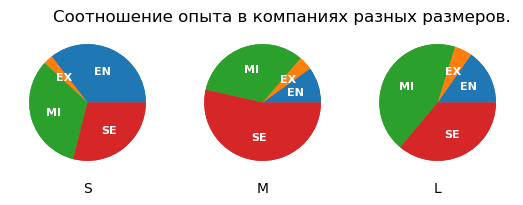

In [20]:
df_for_this_cell = pd.crosstab(df['experience_level'], df['company_size'], values=df['salary_in_usd'], aggfunc='count').sort_index(ascending=False, axis=1)

print('Есть ли связь между наличием уровней опыта работы, и размером компании?', '\n')
print('Проводим тест хи-квадрат для категориальных признаков:')
print('p_value (H1: связь есть) = %.10f,' % stats.chi2_contingency(df_for_this_cell)[1], f'при alpha = {alpha}.', '\n')
print('Вывод:', '\n', 'p_value нам снова говорит, что мы можем отвернуть H0 и сказать,', '\n', 'что связь между наличием разнообразия уровней опыта и размером компании - есть.')

ax = df_for_this_cell.plot(kind='pie', subplots=True, legend=False, labels=None);

for i in range(len(ax)):
    ax[i].set_xlabel(ax[i].get_ylabel())
    ax[i].set_ylabel('')
    wedges, text, autotexts = ax[i].pie(df_for_this_cell.iloc[:, i], labels=df_for_this_cell.index, autopct='%1.1f%%', textprops=dict(color="w"))
    for j in range(len(autotexts)):
        autotexts[j].set_text(text[j].get_text())
    plt.setp(autotexts, size=8, weight="bold")

plt.title('Соотношение опыта в компаниях разных размеров.', loc='right');

plt.show('png')

Такс, какое бы ещё исследование провести. Вы знаете, у меня с фантазией плохо, что-то улучшить или выполнить задачу - могу, а вот что-то придумать - нет. У меня так во всём. 

Я долго думал.. И пока в голову пришли только вот такие 2 проверки:

Правда ли, что в США работать выгодней, чем не в США? и  
Правда ли, что на 100% удалёнке работать выгодней, чем как-либо иначе?

Оба случая +/- одинаковые, 2 ненормальных, независимых признака... аххахахха  
Манн-Уитни нам в помощь. $H_0$: не правда, $H_1$: правда.

Следующие 3 ячейки кода нужно свернуть (нажать на полосочку рядом с кнопкой запустить ячейку), тогда станет всё понятно.  
Запустите ячейку с вопросом, запустите ячейку с ответом.

In [26]:
# Правда ли, что на 100% удалёнке работать выгодней?
question = 'Правда ли, что на 100% удалёнке работать выгодней, с фулл тайм трудоустройством разумеется?:'

remote_100_arr = df.loc[df['remote_ratio'] == 100, 'salary_in_usd'].reset_index(drop=True)
remote_0_50_arr = df.loc[df['remote_ratio'] != 100, 'salary_in_usd'].reset_index(drop=True)

min_for_this_cell = min(len(remote_100_arr), len(remote_0_50_arr))



df_for_this_cell = pd.concat([remote_100_arr.sample(min_for_this_cell, ignore_index=True), 
                              remote_0_50_arr.sample(min_for_this_cell, ignore_index=True)],
                             axis=1, keys=['полная удалёнка', 'иная'])

arr_1, arr_2 = df_for_this_cell['полная удалёнка'], df_for_this_cell['иная']

In [23]:
# Правда ли, что в США работать выгодней?
question = 'Правда ли, что в США работать выгодней?:'

us_array = df.loc[df['company_location'] == 'US', 'salary_in_usd'].reset_index(drop=True)
not_us_array = df.loc[df['company_location'] != 'US', 'salary_in_usd'].reset_index(drop=True)

min_for_this_cell = min(len(us_array), len(not_us_array))

df_for_this_cell = pd.concat([us_array.sample(min_for_this_cell, ignore_index=True), 
                              not_us_array.sample(min_for_this_cell, ignore_index=True)],
                             axis=1, keys=['US', 'Not US'])

arr_1, arr_2 = df_for_this_cell['US'], df_for_this_cell['Not US']

In [24]:
# Ответ на вопрос:
print(question, '\n')

# ПроШапироВилкаем признаки.
print('ШапироВилканье:')
print(*[i+'\n' for i in shapirowilk(df_for_this_cell)])

print('Проводим U-критерий Манна-Уитни и.. Уилкоксона.. Просто так, хз:')
print(f'p_value H1: {arr_1.name} > {arr_2.name} = %.20f,' % stats.mannwhitneyu(arr_1, arr_2, alternative='greater')[1], f'при alpha = {alpha}.')
print(f'p_value H1: {arr_1.name} > {arr_2.name} = %.20f' % stats.wilcoxon(arr_1, arr_2, alternative='greater')[1], f'при alpha = {alpha}.')

print()

print('Вывод: в ячейке markdown ниже.', '\n')

Правда ли, что в США работать выгодней?: 

ШапироВилканье:
Распределение ['US'] нормальное. При alpha = 0.05
 Распределение ['Not US'] не нормальное. При alpha = 0.05

Проводим U-критерий Манна-Уитни и.. Уилкоксона.. Просто так, хз:
p_value H1: US > Not US = 0.00000000000000000000, при alpha = 0.05.
p_value H1: US > Not US = 0.00000000000000000000 при alpha = 0.05.

Вывод: в ячейке markdown ниже. 



Как можно наблюдать, в обоих случаях p_value меньше, результаты статистически значимые, мы ..отвергаем нулевую гипотезу в пользу альтернативной и да, правда, что лучше всего работать в штатах на удалёнке. Лежать на диване у моря и кодить.)) А потом гамать. А потом снова кодить. Что ещё для счастья надо? Блэкджек и шлюхи? Ну это по выходным.)))

Я короче довольно таки долго пилил это ваяние, потому, думаю, я уложился в рамки задач по практике. Да я практически везде использовал только гистограммы, и стакнутые столбчатые диаграммы. Мне нужно больше опыта и знаний, чтобы иметь более богатый ассортимент представления визуализации данных. 

Единственное, что я не сделал - не представил весь спектр статистических тестов:  
- у меня так и не получилось привести ни один массив к нормальному распределению, потому все тесты были непараметрическими;
- у меня не получилось провести тесты для одной выборки, потому что я не знаю, каким бы таким вопросом задаться, чтобы провести такой тест;

Я думал, буду использовать масштабирование, но не срослось.)

По общей логике алгоритма работы всех статистических тестов, мы передаём в них либо массивы чисел, либо таблицы сопряжённости. (из всех, представленных на курсе). Формировать массивы согласно условиям - ну вообще не проблема. Выставлять альтернативу (greater, less), проводить тесты на определение нормальности и на равенство дисперсий - тоже. Как и рисовать графики. Думаю, всё приходит с опытом. Главное продолжать двигаться вперёд и не останавливаться.

Спасибо за просмотр.

P.S. Ниже я пытаюсь нормализовать не нормально распределённый признак. Вот эта колбаса с циклом - это определение имени не нормально распределённого столбца. Я после каждой ячейки удалял переменные, а после последних трёх - нет. И я хз, какая у вас сейчас ячейка активная и какие названия признаков там, потому я решил этот момент обойти. В каждый тест fit_transform или без него, передаётся Series не нормально распределённого столбца. Это либо 'Not US', либо 'полная удалёнка'. И один из них я пытаюсь тут нормализовать. Для меня этот момент не понятен. Оно не нормализуется. Ну или я хреновый нормализатор.) Одно из двух.)

In [27]:
not_normal_series = df_for_this_cell[[df_for_this_cell[i].name for i in df_for_this_cell.columns if stats.shapiro(df_for_this_cell[i])[1] <= alpha][0]]

print(shapirowilk(preprocessing.MinMaxScaler().fit_transform(pd.DataFrame(not_normal_series))))
print(shapirowilk(preprocessing.RobustScaler().fit_transform(pd.DataFrame(not_normal_series))))
print(shapirowilk(preprocessing.StandardScaler().fit_transform(pd.DataFrame(not_normal_series))))
print(shapirowilk(stats.boxcox(not_normal_series)[0]))
print(shapirowilk(preprocessing.scale(pd.DataFrame(not_normal_series))))
print(shapirowilk(pd.DataFrame(preprocessing.normalize(df_for_this_cell), columns=df_for_this_cell.columns)[not_normal_series.name]))
print(shapirowilk(preprocessing.PowerTransformer(method='yeo-johnson').fit_transform(pd.DataFrame(not_normal_series))))
print(shapirowilk(preprocessing.QuantileTransformer(n_quantiles=min(1000, len(df_for_this_cell)), output_distribution='normal').fit_transform(pd.DataFrame(not_normal_series))))
print(shapirowilk(np.log1p(not_normal_series)))

Распределение не нормальное. При alpha = 0.05
Распределение не нормальное. При alpha = 0.05
Распределение не нормальное. При alpha = 0.05
Распределение нормальное. При alpha = 0.05
Распределение не нормальное. При alpha = 0.05
Распределение не нормальное. При alpha = 0.05
Распределение нормальное. При alpha = 0.05
Распределение не нормальное. При alpha = 0.05
Распределение не нормальное. При alpha = 0.05


Спустя время я вернулся к проекту, чтобы его оформить и.. о чудо! Некоторые нормализаторы работают!)  
`boxcox` и `PowerTransformer`!

Спасибо за просмотр.

[↑ contents](#contents)